Importing modules

In [1]:
#suppressing a warning - UserWarning: Wswiglal-redir-stdio
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal
import lal as _lal

In [2]:
import sys

sys.path.insert(0, "../")
from regular_precession import *
from systems_lib import *
from mismatch_n_SNR import *
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.dpi"] = 200

Loading the saved data for different precession parameter values.

$\tilde{\theta} = 4$ or 8 and $\tilde{\Omega} = 2$ or 3

In [3]:

import pickle

# Load data from pickle files - Already saved from previous runs - example code for the runs in comments at the end of this file

with open('saved_data/mismatch_data_plus_SNRs/mismatch_SNR_J_a4_f2.pkl', 'rb') as f:
    Z_J_a4_f2 = pickle.load(f)

with open('saved_data/mismatch_data_plus_SNRs/mismatch_SNR_J_a4_f3.pkl', 'rb') as f:
    Z_J_a4_f3 = pickle.load(f)

with open('saved_data/mismatch_data_plus_SNRs/mismatch_SNR_J_a8_f2.pkl', 'rb') as f:
    Z_J_a8_f2 = pickle.load(f)

with open('saved_data/mismatch_data_plus_SNRs/mismatch_SNR_J_a8_f3.pkl', 'rb') as f:
    Z_J_a8_f3 = pickle.load(f)

with open('saved_data/mismatch_data_plus_SNRs/mismatch_SNR_S_a4_f2.pkl', 'rb') as f:
    Z_S_a4_f2 = pickle.load(f)

with open('saved_data/mismatch_data_plus_SNRs/mismatch_SNR_S_a4_f3.pkl', 'rb') as f:
    Z_S_a4_f3 = pickle.load(f)

with open('saved_data/mismatch_data_plus_SNRs/mismatch_SNR_S_a8_f2.pkl', 'rb') as f:
    Z_S_a8_f2 = pickle.load(f)

with open('saved_data/mismatch_data_plus_SNRs/mismatch_SNR_S_a8_f3.pkl', 'rb') as f:
    Z_S_a8_f3 = pickle.load(f)

Extracting data from the loaded dictionaries: Dictionaries include mismatches and SNRs calculated.

In [4]:
phi_J = np.linspace(0, 2 * np.pi, 101)

cos_theta_J = np.linspace(-1, 1, 101)
theta_J = np.arccos(cos_theta_J)

gamma_P = np.linspace(0, 2*np.pi, 50)

Z_J_a4_f2 = np.array(Z_J_a4_f2).reshape(len(theta_J), len(phi_J), len(gamma_P), 2)
Z_J_a4_f3 = np.array(Z_J_a4_f3).reshape(len(theta_J), len(phi_J), len(gamma_P), 2)
Z_J_a8_f2 = np.array(Z_J_a8_f2).reshape(len(theta_J), len(phi_J), len(gamma_P), 2)
Z_J_a8_f3 = np.array(Z_J_a8_f3).reshape(len(theta_J), len(phi_J), len(gamma_P), 2)

Z_J_a4_f2_mismatch = Z_J_a4_f2[:, :, :, 0]
Z_J_a4_f2_snr = Z_J_a4_f2[:, :, :, 1]

Z_J_a4_f3_mismatch = Z_J_a4_f3[:, :, :, 0]
Z_J_a4_f3_snr = Z_J_a4_f3[:, :, :, 1]

Z_J_a8_f2_mismatch = Z_J_a8_f2[:, :, :, 0]
Z_J_a8_f2_snr = Z_J_a8_f2[:, :, :, 1]

Z_J_a8_f3_mismatch = Z_J_a8_f3[:, :, :, 0]
Z_J_a8_f3_snr = Z_J_a8_f3[:, :, :, 1]


Mismatch_J_a4_f2 = np.zeros((len(theta_J), len(phi_J), len(gamma_P)))
SNR_J_a4_f2 = np.zeros((len(theta_J), len(phi_J), len(gamma_P)))
Mismatch_J_a4_f3 = np.zeros((len(theta_J), len(phi_J), len(gamma_P)))
SNR_J_a4_f3 = np.zeros((len(theta_J), len(phi_J), len(gamma_P)))
Mismatch_J_a8_f2 = np.zeros((len(theta_J), len(phi_J), len(gamma_P)))
SNR_J_a8_f2 = np.zeros((len(theta_J), len(phi_J), len(gamma_P)))
Mismatch_J_a8_f3 = np.zeros((len(theta_J), len(phi_J), len(gamma_P)))
SNR_J_a8_f3 = np.zeros((len(theta_J), len(phi_J), len(gamma_P)))

SNR_J_NP = np.zeros((len(theta_J), len(phi_J), len(gamma_P)))

for i in range(len(theta_J)):
    for j in range(len(phi_J)):
        for k in range(len(gamma_P)):
            Mismatch_J_a4_f2[i, j, k] = Z_J_a4_f2_mismatch[i, j, k]['mismatch']
            SNR_J_a4_f2[i, j, k] = Z_J_a4_f2_snr[i, j, k]['SNR_RPRP']

            Mismatch_J_a4_f3[i, j, k] = Z_J_a4_f3_mismatch[i, j, k]['mismatch']
            SNR_J_a4_f3[i, j, k] = Z_J_a4_f3_snr[i, j, k]['SNR_RPRP']

            Mismatch_J_a8_f2[i, j, k] = Z_J_a8_f2_mismatch[i, j, k]['mismatch']
            SNR_J_a8_f2[i, j, k] = Z_J_a8_f2_snr[i, j, k]['SNR_RPRP']

            Mismatch_J_a8_f3[i, j, k] = Z_J_a8_f3_mismatch[i, j, k]['mismatch']
            SNR_J_a8_f3[i, j, k] = Z_J_a8_f3_snr[i, j, k]['SNR_RPRP']

            SNR_J_NP[i, j, k] = Z_J_a4_f2_snr[i, j, k]['SNR_NPNP']

lindblom_J_a4_f2 = Mismatch_J_a4_f2 - 0.5*(SNR_J_a4_f2)**(-2)
lindblom_J_a4_f3 = Mismatch_J_a4_f3 - 0.5*(SNR_J_a4_f3)**(-2)
lindblom_J_a8_f2 = Mismatch_J_a8_f2 - 0.5*(SNR_J_a8_f2)**(-2)
lindblom_J_a8_f3 = Mismatch_J_a8_f3 - 0.5*(SNR_J_a8_f3)**(-2)

min_lindblom_J_a4_f2 = np.min(lindblom_J_a4_f2, axis=2)
min_lindblom_J_a4_f3 = np.min(lindblom_J_a4_f3, axis=2)
min_lindblom_J_a8_f2 = np.min(lindblom_J_a8_f2, axis=2)
min_lindblom_J_a8_f3 = np.min(lindblom_J_a8_f3, axis=2)


In [5]:
cos_theta_S = np.linspace(-1, 1, 101)
theta_S = np.arccos(cos_theta_S)
phi_S = np.linspace(0, 2 * np.pi, 101)
gamma_P = np.linspace(0, 2 * np.pi, 50)

Z_S_a4_f2 = np.array(Z_S_a4_f2).reshape(len(theta_S), len(phi_S), len(gamma_P), 2)
Z_S_a4_f3 = np.array(Z_S_a4_f3).reshape(len(theta_S), len(phi_S), len(gamma_P), 2)
Z_S_a8_f2 = np.array(Z_S_a8_f2).reshape(len(theta_S), len(phi_S), len(gamma_P), 2)
Z_S_a8_f3 = np.array(Z_S_a8_f3).reshape(len(theta_S), len(phi_S), len(gamma_P), 2)

Z_S_a4_f2_mismatch = Z_S_a4_f2[:, :, :, 0]
Z_S_a4_f2_snr = Z_S_a4_f2[:, :, :, 1]

Z_S_a4_f3_mismatch = Z_S_a4_f3[:, :, :, 0]
Z_S_a4_f3_snr = Z_S_a4_f3[:, :, :, 1]

Z_S_a8_f2_mismatch = Z_S_a8_f2[:, :, :, 0]
Z_S_a8_f2_snr = Z_S_a8_f2[:, :, :, 1]

Z_S_a8_f3_mismatch = Z_S_a8_f3[:, :, :, 0]
Z_S_a8_f3_snr = Z_S_a8_f3[:, :, :, 1]

Mismatch_S_a4_f2 = np.zeros((len(theta_S), len(phi_S), len(gamma_P)))
SNR_S_a4_f2 = np.zeros((len(theta_S), len(phi_S), len(gamma_P)))
Mismatch_S_a4_f3 = np.zeros((len(theta_S), len(phi_S), len(gamma_P)))
SNR_S_a4_f3 = np.zeros((len(theta_S), len(phi_S), len(gamma_P)))
Mismatch_S_a8_f2 = np.zeros((len(theta_S), len(phi_S), len(gamma_P)))
SNR_S_a8_f2 = np.zeros((len(theta_S), len(phi_S), len(gamma_P)))
Mismatch_S_a8_f3 = np.zeros((len(theta_S), len(phi_S), len(gamma_P)))
SNR_S_a8_f3 = np.zeros((len(theta_S), len(phi_S), len(gamma_P)))

SNR_S_NP = np.zeros((len(theta_S), len(phi_S), len(gamma_P)))

for i in range(len(theta_S)):
    for j in range(len(phi_S)):
        for k in range(len(gamma_P)):
            Mismatch_S_a4_f2[i, j, k] = Z_S_a4_f2_mismatch[i, j, k]['mismatch']
            SNR_S_a4_f2[i, j, k] = Z_S_a4_f2_snr[i, j, k]['SNR_RPRP']

            Mismatch_S_a4_f3[i, j, k] = Z_S_a4_f3_mismatch[i, j, k]['mismatch']
            SNR_S_a4_f3[i, j, k] = Z_S_a4_f3_snr[i, j, k]['SNR_RPRP']

            Mismatch_S_a8_f2[i, j, k] = Z_S_a8_f2_mismatch[i, j, k]['mismatch']
            SNR_S_a8_f2[i, j, k] = Z_S_a8_f2_snr[i, j, k]['SNR_RPRP']

            Mismatch_S_a8_f3[i, j, k] = Z_S_a8_f3_mismatch[i, j, k]['mismatch']
            SNR_S_a8_f3[i, j, k] = Z_S_a8_f3_snr[i, j, k]['SNR_RPRP']

            SNR_S_NP[i, j, k] = Z_S_a4_f2_snr[i, j, k]['SNR_NPNP']

lindblom_S_a4_f2 = Mismatch_S_a4_f2 - 0.5*(SNR_S_a4_f2)**(-2)
lindblom_S_a4_f3 = Mismatch_S_a4_f3 - 0.5*(SNR_S_a4_f3)**(-2)
lindblom_S_a8_f2 = Mismatch_S_a8_f2 - 0.5*(SNR_S_a8_f2)**(-2)
lindblom_S_a8_f3 = Mismatch_S_a8_f3 - 0.5*(SNR_S_a8_f3)**(-2)

min_lindblom_S_a4_f2 = np.min(lindblom_S_a4_f2, axis=2)
min_lindblom_S_a4_f3 = np.min(lindblom_S_a4_f3, axis=2)
min_lindblom_S_a8_f2 = np.min(lindblom_S_a8_f2, axis=2)
min_lindblom_S_a8_f3 = np.min(lindblom_S_a8_f3, axis=2)


In [6]:
# Here we add two_pa contour line calculations

def two_pa_J_contour(args):
    """
    Calculating cos2pa and sin2pa for different binary orientation (theta_J, phi_J)
    """
    x, y = args
    
    np_params["theta_J"] = x
    np_params["phi_J"] = y
    
    # Fix sky location
    np_params["theta_S"] = np.pi / 4
    np_params["phi_S"] = 0.0
    
    Precession_init = Regular_precession(np_params)
    
    f_range = np.linspace(20, 1000, 100)  # Frequency range for the calculation - does not matter for NP
    
    C, sin2pa, cos2pa = Precession_init.beam_pattern_amplitude_and_phase(f_range)
    
    cos2pa_np = cos2pa[0] # Since this is NP, there is no frequency dependence in the cos2pa and sin2pa - taking the first element

    sin_2pa_np = sin2pa[0]

    return cos2pa_np, sin_2pa_np

def two_pa_S_contour(args):
    """
    Calculating cos2pa and sin2pa for different sky locations (theta_S, phi_S)
    """
    x, y = args
    
    # Fix binary orientation
    np_params["theta_J"] = np.pi / 4
    np_params["phi_J"] = 0.0
    
    np_params["theta_S"] = x
    np_params["phi_S"] = y
    
    Precession_init = Regular_precession(np_params)
    
    f_range = np.linspace(20, 1000, 100)  # Frequency range for the calculation - does not matter for NP
    
    C, sin2pa, cos2pa = Precession_init.beam_pattern_amplitude_and_phase(f_range)

    cos2pa_np = cos2pa[0]  # Since this is NP, there is no frequency dependence in the cos2pa and sin2pa - taking the first element

    sin_2pa_np = sin2pa[0]
    
    return cos2pa_np, sin_2pa_np

# For Z_J_2pa, with varying theta_J and phi_J, we calculate cos2pa and sin2pa values
cos_theta_J_arr = np.linspace(-1, 1, 101)
theta_J_arr = np.arccos(cos_theta_J_arr)
phi_J_arr = np.linspace(0, 2 * np.pi, 101)

import multiprocessing as mp
pool = mp.Pool(mp.cpu_count())

Z_J_2pa = pool.map(two_pa_J_contour, [(theta, phi) for theta in theta_J_arr for phi in phi_J_arr]);

Z_J_2pa = np.array(Z_J_2pa).reshape(len(theta_J_arr), len(phi_J_arr), 2)

Z_J_cos2pa = Z_J_2pa[:, :, 0]  # Extracting cos2pa values
Z_J_sin2pa = Z_J_2pa[:, :, 1]  # Extracting sin2pa values

# For Z_S_2pa, we will use the same approach but with theta_S and phi_S
cos_theta_S_arr = np.linspace(-1, 1, 101)
theta_S_arr = np.arccos(cos_theta_S_arr)
phi_S_arr = np.linspace(0, 2 * np.pi, 101)

Z_S_2pa = pool.map(two_pa_S_contour, [(theta, phi) for theta in theta_S_arr for phi in phi_S_arr]);
Z_S_2pa = np.array(Z_S_2pa).reshape(len(theta_S_arr), len(phi_S_arr), 2)

Z_S_cos2pa = Z_S_2pa[:, :, 0]  # Extracting cos2pa values
Z_S_sin2pa = Z_S_2pa[:, :, 1]  # Extracting sin2pa values

/Users/tamanjyotsingh/Documents/GitHub/regular_precession/notebooks/../regular_precession.py:225: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi
/Users/tamanjyotsingh/Documents/GitHub/regular_precession/notebooks/../regular_precession.py:225: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi
/Users/tamanjyotsingh/Documents/GitHub/regular_precession/notebooks/../regular_precession.py:225: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi
/Users/tamanjyotsingh/Documents/GitHub/regular_precession/notebooks/../regular_precession.py:225: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi
/Users/tamanjyotsingh/Documents/GitHub/regular_precession/notebooks/../regular_precession.py:225: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi
/Users/tamanjyotsingh/Documents/GitHub/regular_precession/notebooks/../regular_precession.py:22

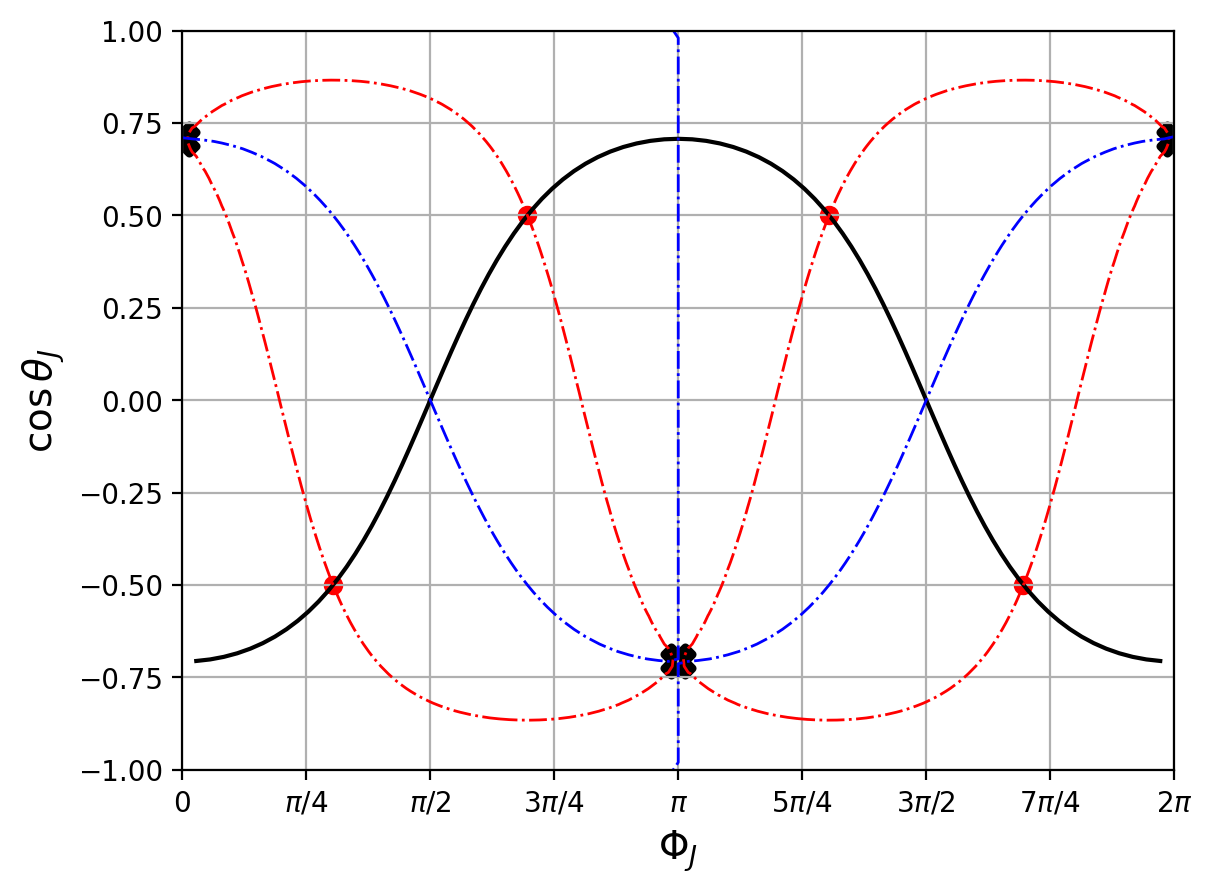

In [ ]:
import math

lambda_array = np.linspace(0, 2*np.pi, 101)
theta_array_edgeon = []
phi_array_edgeon = []

#(1/sqrt(2))*(x-z)*sin lambda + y*cos lambda
it = 0
for l in lambda_array:
    theta = np.arctan2((1 + ((np.cos(l))**2))**(1/2), - np.sin(l))
    phi = np.arctan2((2**(1/2)) * np.cos(l), np.sin(l))
    
    if phi < 0:
        phi += 2*np.pi
        it += 1
    if it == 1:
        theta = math.nan
        
    if abs(theta + 0.707) < 1e-1:
        phi = 0
    
    theta_array_edgeon.append(theta)
    phi_array_edgeon.append(phi)
            
plt.plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k')

phi_array_faceon = [0, np.pi, 2*np.pi]

theta_array_faceon = [np.pi/4, 3*np.pi/4, np.pi/4]

phi_plus_null_J = np.arctan2(np.sqrt(2), 1)  

phi_array_plus_null_J = [phi_plus_null_J, np.pi + phi_plus_null_J, np.pi - phi_plus_null_J, 2 * np.pi - phi_plus_null_J]

cos_theta_array_plus_null_J = [-0.5, 0.5, 0.5, -0.5]

plt.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'k', marker = 'X', s=100, linewidths=3)

plt.scatter(phi_array_plus_null_J, cos_theta_array_plus_null_J, color = 'r')

plt.contour(phi_J_arr, cos_theta_J_arr, Z_J_cos2pa, levels=[0], colors='red', linewidths=1, linestyles='-.')

plt.contour(phi_J_arr, cos_theta_J_arr, Z_J_sin2pa, levels=[0], colors='blue', linewidths=1, linestyles='-.')

plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi], [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$', r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$', r'$2\pi$'])

plt.xlabel(r'$\phi_J$', fontsize=14)
plt.ylabel(r'$\cos\theta_J$', fontsize=14)

plt.grid()

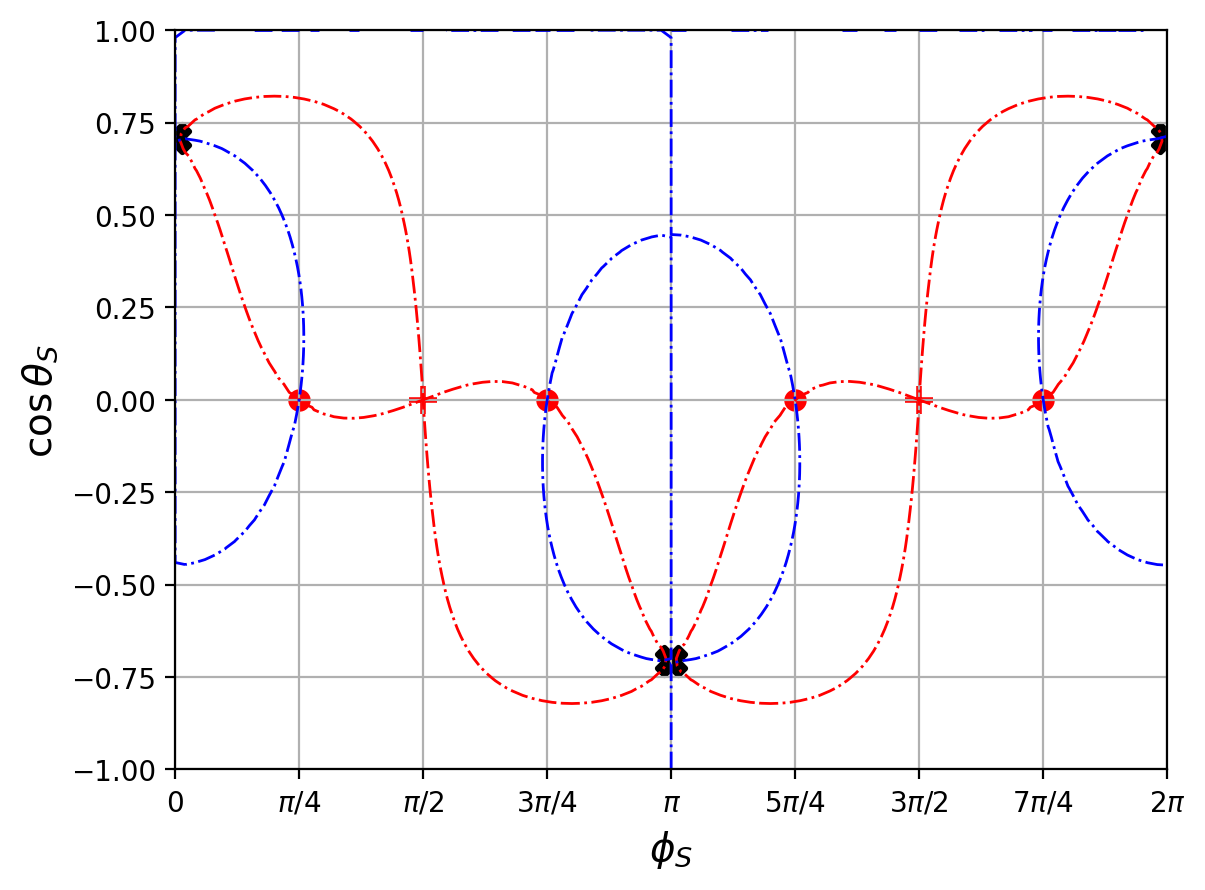

In [8]:
import math

lambda_array = np.linspace(0, 2*np.pi, 101)
theta_array_edgeon = []
phi_array_edgeon = []

#(1/sqrt(2))*(x-z)*sin lambda + y*cos lambda
it = 0
for l in lambda_array:
    theta = np.arctan2((1 + ((np.cos(l))**2))**(1/2), - np.sin(l))
    phi = np.arctan2((2**(1/2)) * np.cos(l), np.sin(l))
    
    if phi < 0:
        phi += 2*np.pi
        it += 1
    if it == 1:
        theta = math.nan
        
    if abs(theta + 0.707) < 1e-1:
        phi = 0
    
    theta_array_edgeon.append(theta)
    phi_array_edgeon.append(phi)

phi_array_faceon = [0, np.pi, 2*np.pi]

theta_array_faceon = [np.pi/4, 3*np.pi/4, np.pi/4]

phi_array_true_null_S = [np.pi/4, 3*np.pi/4, 5*np.pi/4, 7*np.pi/4]

theta_array_true_null_S = [np.pi/2, np.pi/2, np.pi/2, np.pi/2]

phi_array_plus_null_S = [np.pi/2, 3*np.pi/2]

theta_array_plus_null_S = [np.pi/2, 3*np.pi/2]

plt.scatter(phi_array_true_null_S, np.cos(theta_array_true_null_S), color = 'r', marker='o', s=50)

plt.scatter(phi_array_plus_null_S, np.cos(theta_array_plus_null_S), color = 'red', marker='+', s=100, linewidths=2)

plt.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'k', marker='X', s=100, linewidths=2)

plt.contour(phi_J_arr, cos_theta_J_arr, Z_S_cos2pa, levels=[0], colors='red', linewidths=1, linestyles='-.')
plt.contour(phi_J_arr, cos_theta_J_arr, Z_S_sin2pa, levels=[0], colors='blue', linewidths=1, linestyles='-.')
plt.xlabel(r'$\phi_S$', fontsize=14)
plt.ylabel(r'$\cos\theta_S$', fontsize=14)

plt.xticks(np.arange(0, 2*np.pi + np.pi/4, np.pi/4),
           [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$', 
            r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$', r'$2\pi$']);

plt.grid(True)


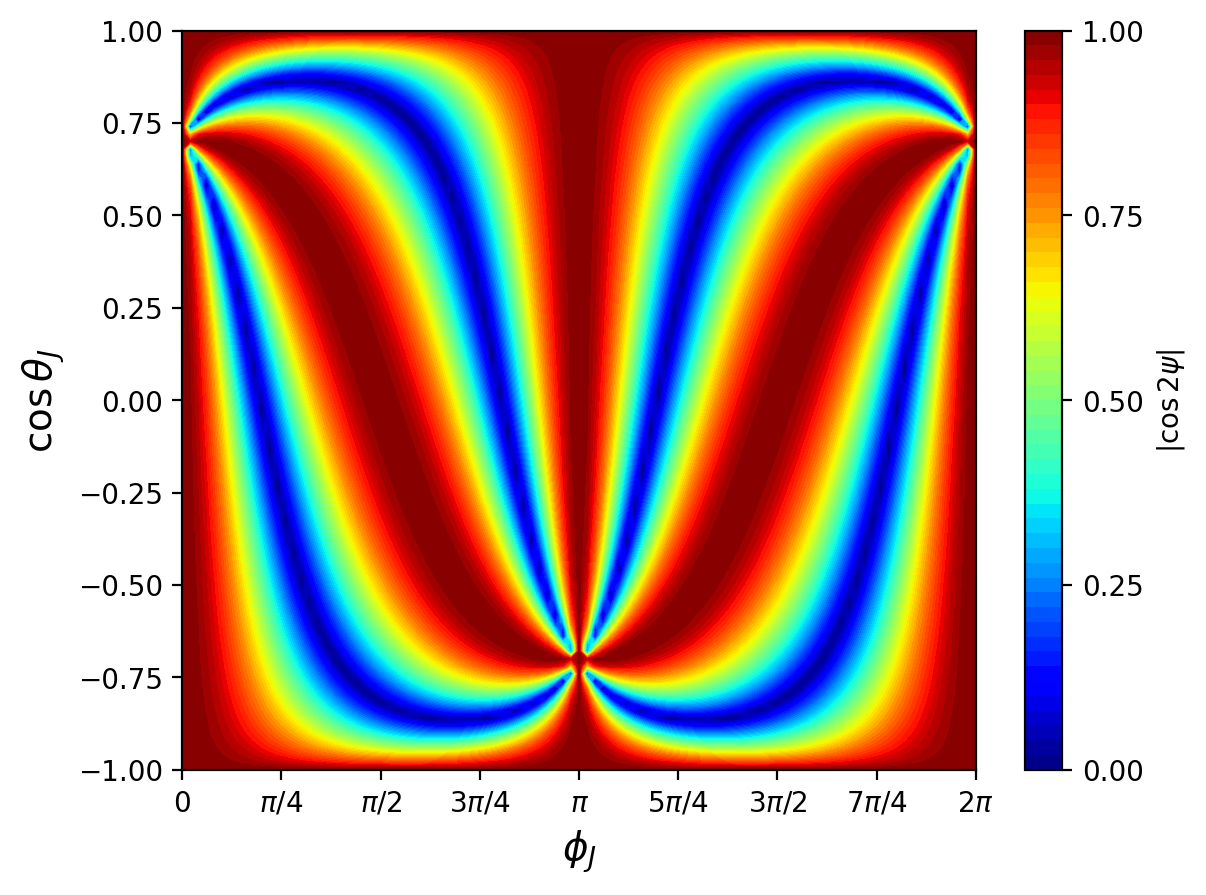

In [21]:
plt.contourf(phi_J_arr, cos_theta_J_arr, abs(Z_J_cos2pa), levels=50, cmap='jet')
plt.colorbar(label=r'$\vert\cos2\psi\vert$', ticks=[0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r'$\phi_J$', fontsize=14)
plt.ylabel(r'$\cos\theta_J$', fontsize=14)
plt.xticks(np.arange(0, 2*np.pi + np.pi/4, np.pi/4), [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$', r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$', r'$2\pi$']);



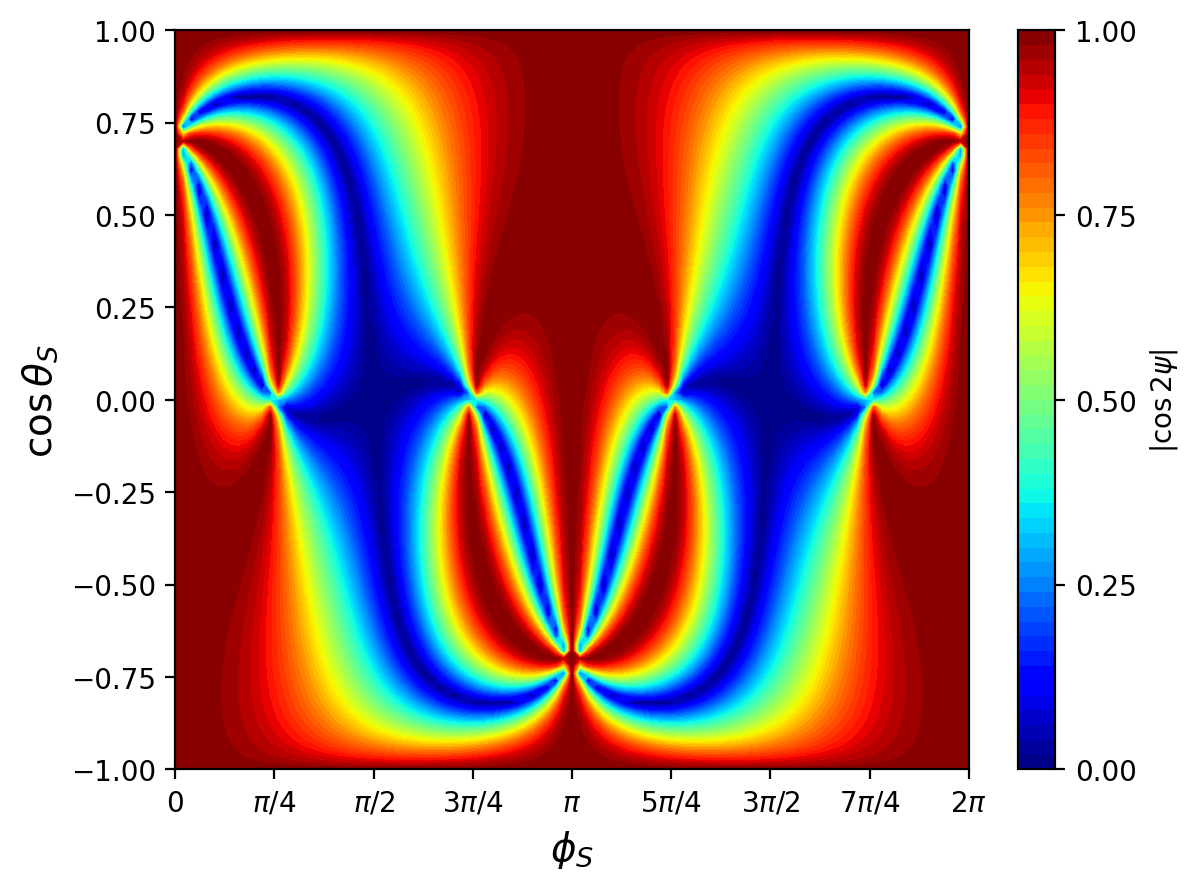

In [20]:
plt.contourf(phi_S_arr, cos_theta_S_arr, abs(Z_S_cos2pa), levels=50, cmap='jet')
plt.colorbar(label=r'$\vert\cos2\psi\vert$', ticks=[0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r'$\phi_S$', fontsize=14)
plt.ylabel(r'$\cos\theta_S$', fontsize=14)
plt.xticks(np.arange(0, 2*np.pi + np.pi/4, np.pi/4), [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$', r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$', r'$2\pi$']);



SNR contours

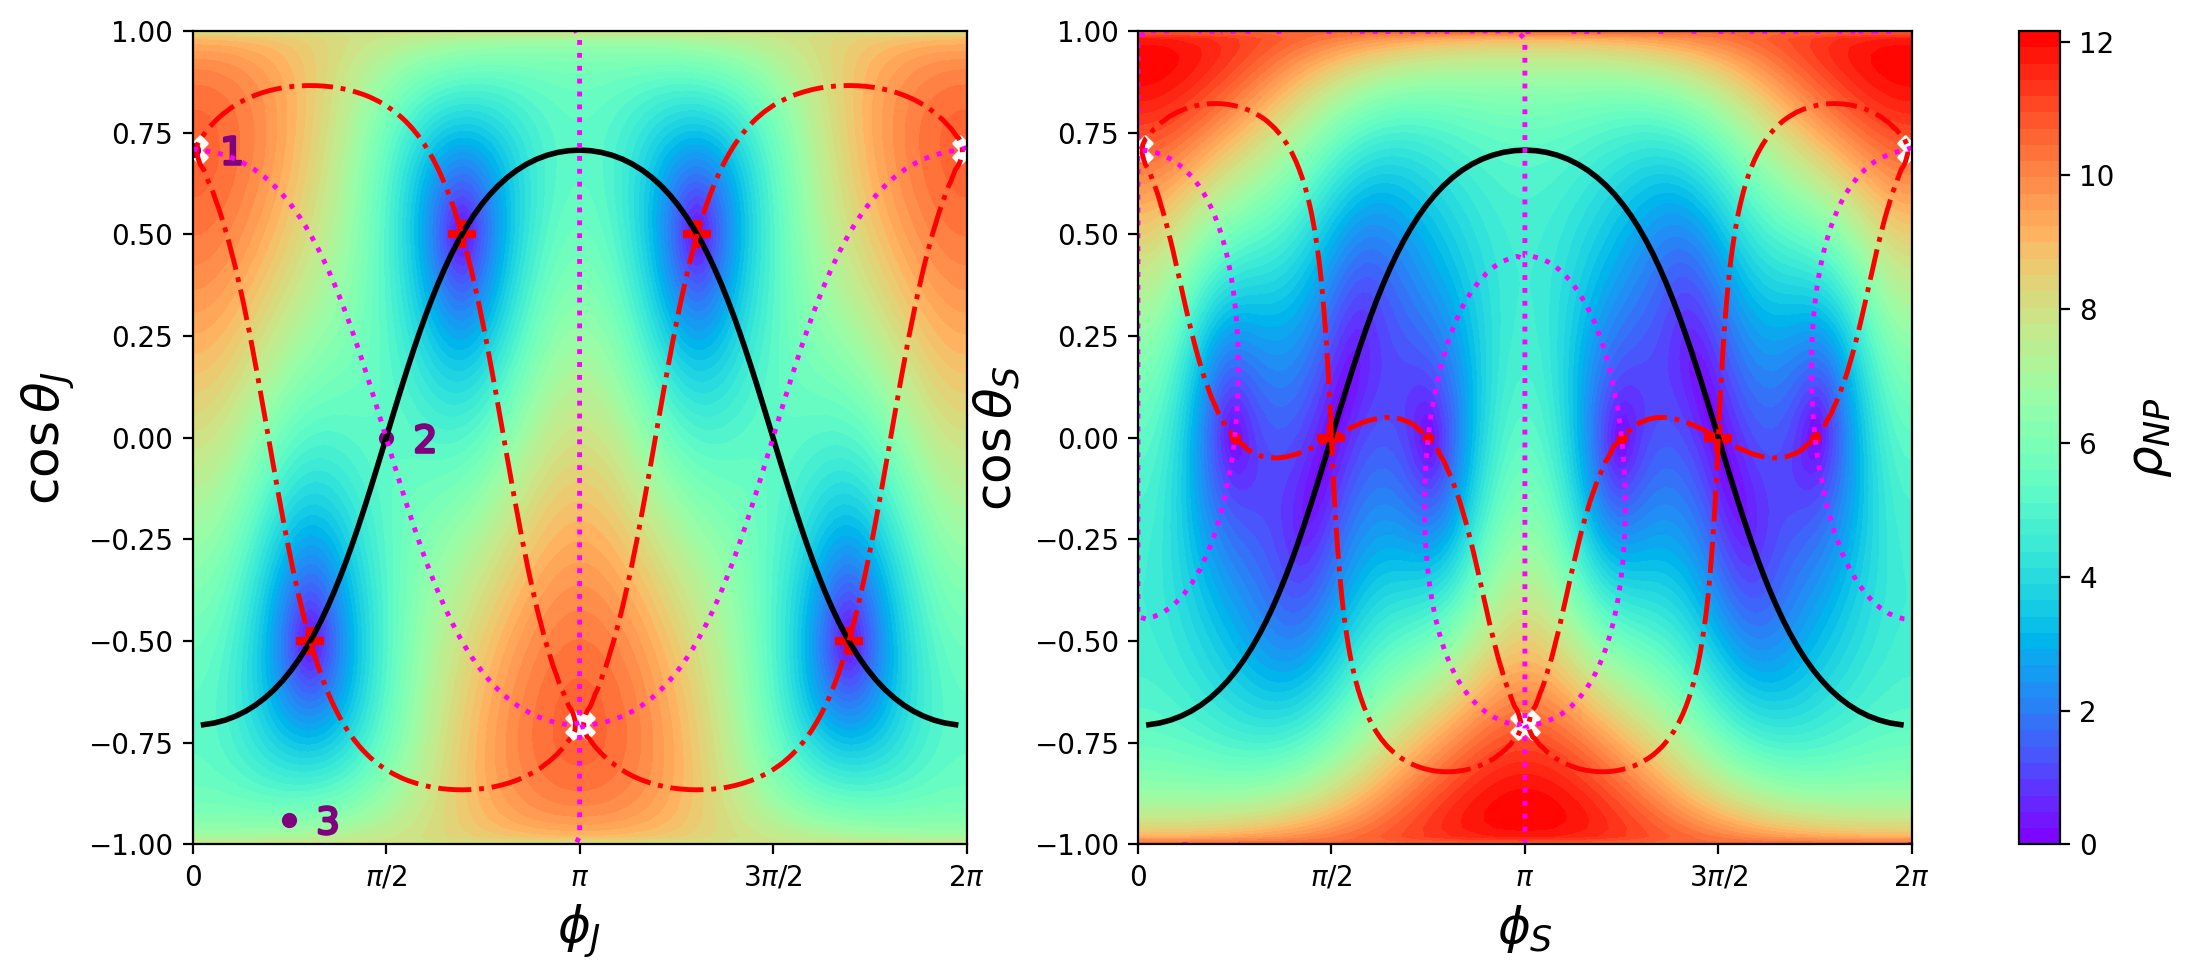

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=False, sharex=True)

color_levels_row = np.linspace(0, 12.1575, 51)
color_map = 'rainbow'

contour = ax[0].contourf(phi_J, np.cos(theta_J), SNR_J_NP[:, :, 0], color_levels_row, cmap=color_map, vmin = 0) # SNR_J_NP is the SNR for the NP case, which is the same for all gamma_P - can take just the first slice
ax[1].contourf(phi_S, np.cos(theta_S), SNR_S_NP[:, :, 0], color_levels_row, cmap=color_map, vmin = 0) # Same for SNR_S_NP

ax[0].scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
ax[1].scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)

ax[0].plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)
ax[1].plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)

ax[0].scatter(0, np.cos(np.pi/4), color = 'purple', marker='o', s=20) # System 1 symbol
ax[0].scatter(np.pi/2, np.cos(np.pi/2), color = 'purple', marker='o', s=20) # System 2 symbol
ax[0].scatter(np.pi/4, np.cos(8*np.pi/9), color = 'purple', marker='o', s=20) # System 3 symbol

ax[0].scatter(0.3, np.cos(np.pi/4), color = 'purple', marker=r'$1$', s=100) # System 1 label
ax[0].scatter(np.pi/2+0.3, np.cos(np.pi/2), color = 'purple', marker=r'$2$', s=100) # System 2 label
ax[0].scatter(np.pi/4+0.3, np.cos(8*np.pi/9), color = 'purple', marker=r'$3$', s=100) # System 3 label

ax[0].scatter(phi_array_plus_null_J, cos_theta_array_plus_null_J, color = 'r', marker='+', s=100, linewidth=3) # Plus null points for J
    
ax[0].contour(phi_J_arr, cos_theta_J_arr, Z_J_cos2pa, levels=[0], colors='red', linewidths=1.75, linestyles='-.') # Zero contour lines for cos2pa in J
    
ax[0].contour(phi_J_arr, cos_theta_J_arr, Z_J_sin2pa, levels=[0], colors='magenta', linewidths=1.75, linestyles=':') # Zero contour lines for sin2pa in J

ax[1].scatter(phi_array_true_null_S, np.cos(theta_array_true_null_S), color = 'r', marker='o', s=10) # True null points for S
    
ax[1].scatter(phi_array_plus_null_S, np.cos(theta_array_plus_null_S), color = 'r', marker='+', s=100, linewidths=3) # Plus null points for S

ax[1].contour(phi_S_arr, cos_theta_S_arr, Z_S_cos2pa, levels=[0], colors='red', linewidths=1.75, linestyles = '-.') # Zero contour lines for cos2pa in S

ax[1].contour(phi_S_arr, cos_theta_S_arr, Z_S_sin2pa, levels=[0], colors='magenta', linewidths=1.75, linestyles=':') # Zero contour lines for sin2pa in S

x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

ax[0].set_xlabel(r'$\phi_{J}}$', fontsize = 18)
ax[1].set_xlabel(r'$\phi_{S}}$', fontsize = 18)

ax[0].set_ylabel(r'$\cos{\theta_J}$', fontsize = 18)
ax[1].set_ylabel(r'$\cos{\theta_S}$', fontsize = 18)

ax[0].set_xticks(x_ticks, x_labels)  # Corrected here
ax[1].set_xticks(x_ticks, x_labels)  # Corrected here

plt.tight_layout()

cbar = fig.colorbar(contour, ax=ax[:].ravel().tolist(), orientation='vertical', boundaries = np.linspace(0, 12, 21), ticks = [0, 2, 4, 6, 8, 10, 12], extend = 'both')
# Add a colorbar
cbar.set_label(r'$\rho_{NP}$', fontweight='bold', fontsize = 18) # Increase fontsize here

fig = plt.gcf()
fig.savefig('figs/theta_J_phi_J_theta_S_phi_S_SNR_NP_w_sys.pdf', bbox_inches='tight', format='pdf')

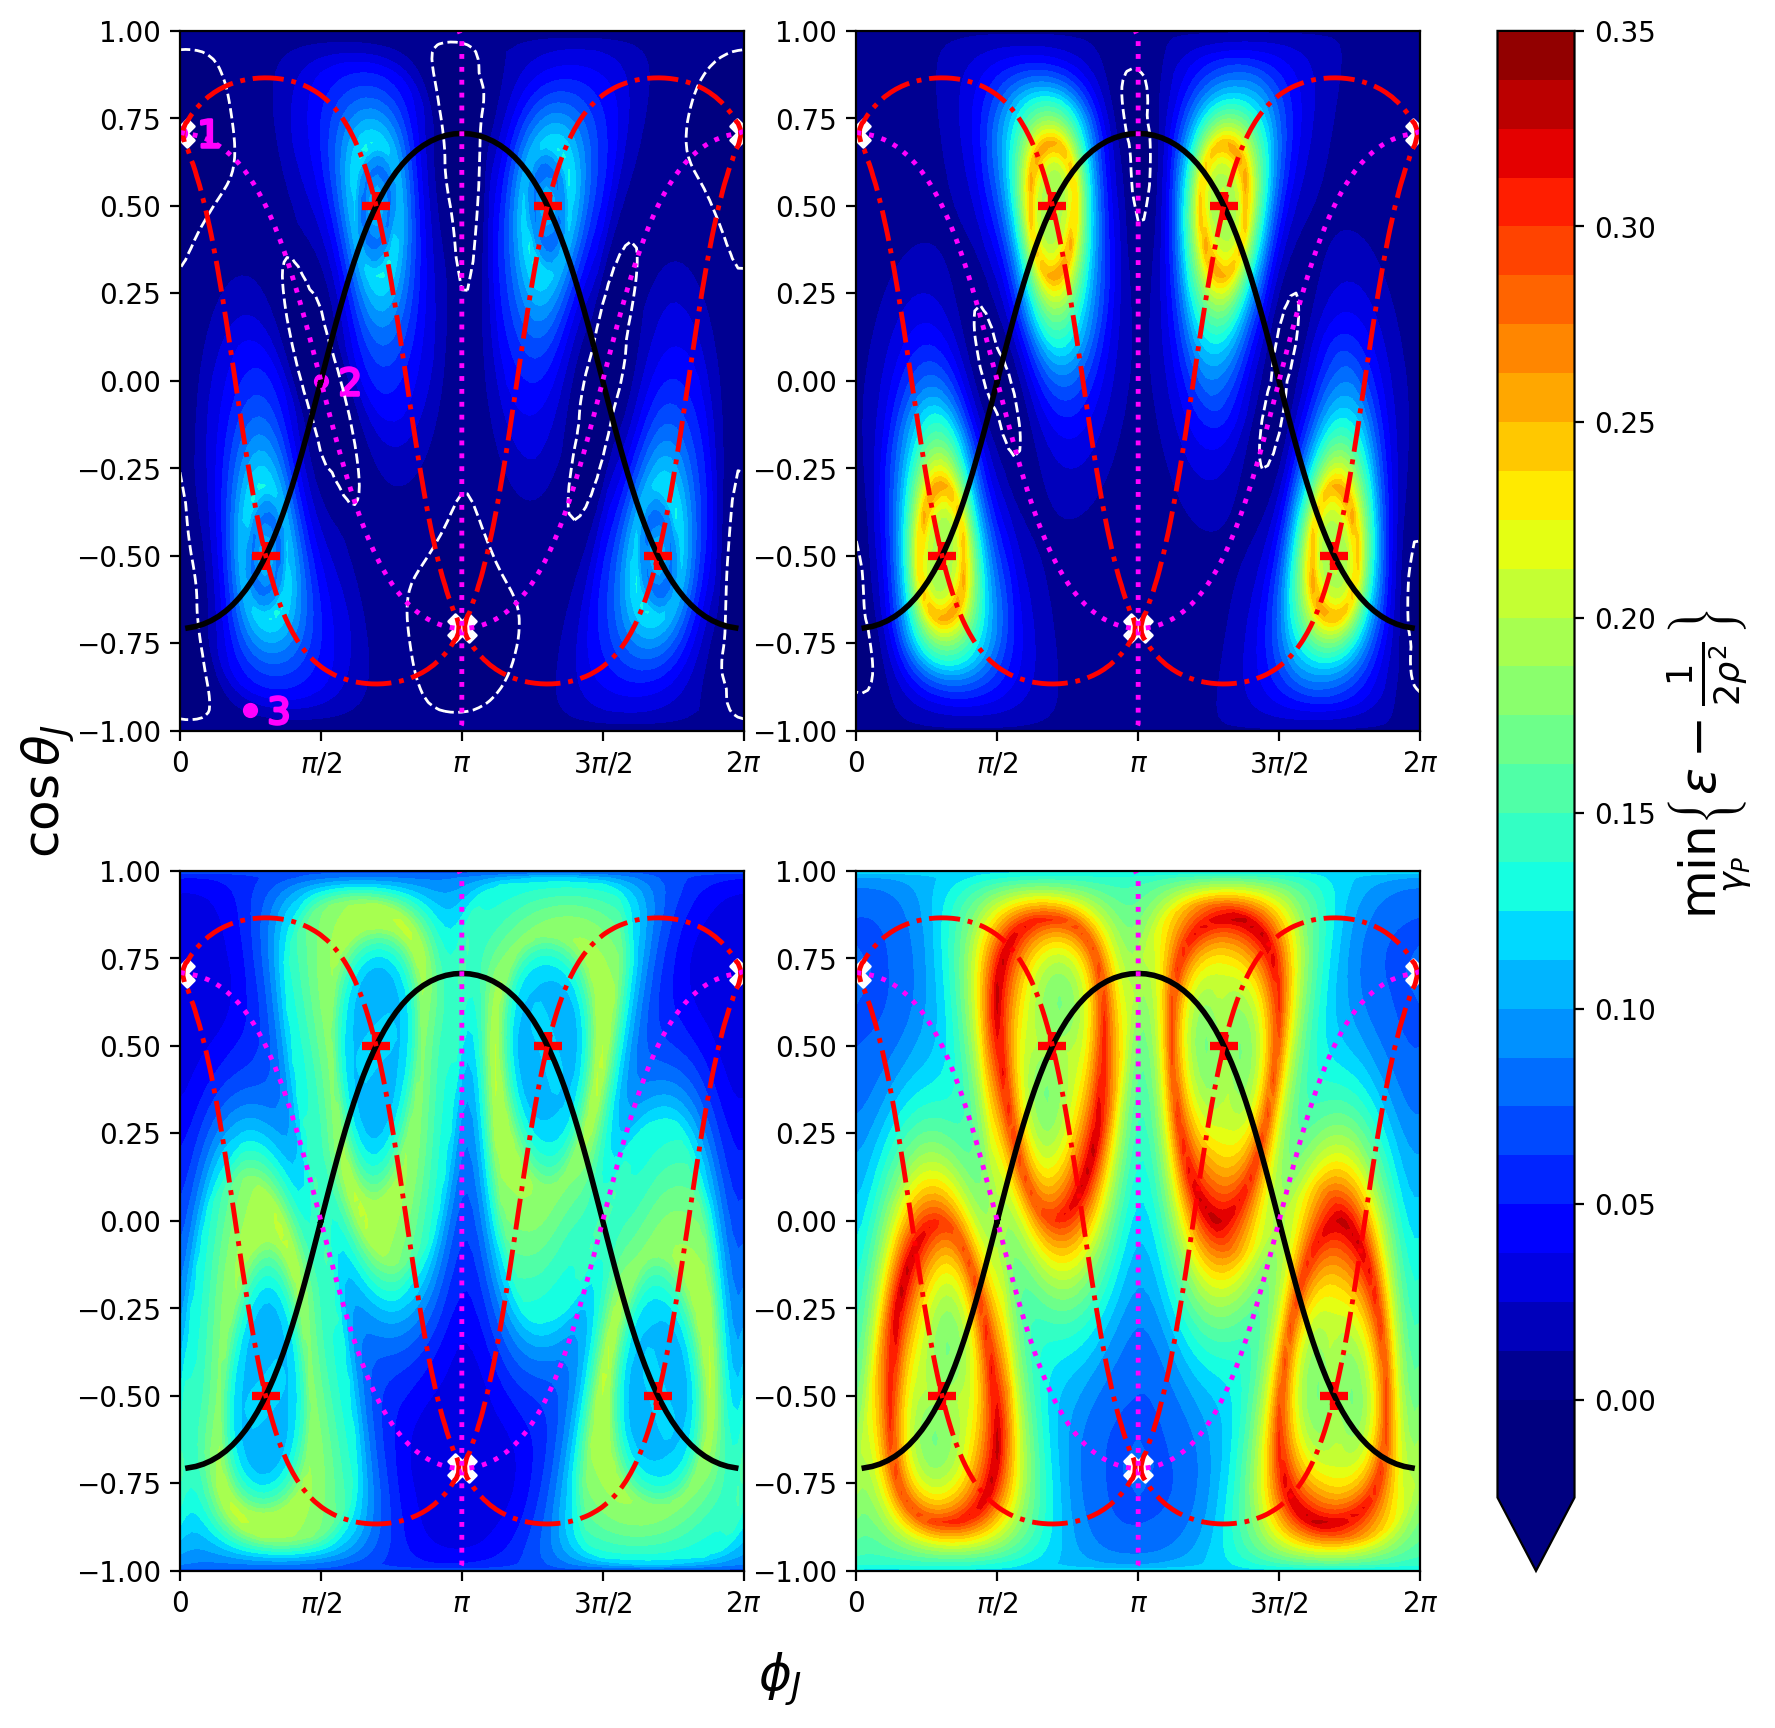

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Create a list of all z arrays
z_arrays = [min_lindblom_J_a4_f2, min_lindblom_J_a4_f3, min_lindblom_J_a8_f2, min_lindblom_J_a8_f3]

#
levels_arr = np.linspace(-0.025, 0.35, 31)

phi_J = np.linspace(0, 2 * np.pi, 101)

cos_theta_J = np.linspace(-1, 1, 101)


for i, ax in enumerate(axs.flat):
    contour = ax.contourf(phi_J, cos_theta_J, z_arrays[i], levels_arr, cmap='jet', vmin = 0, vmax = 0.35, extend = 'min')
    
    contourlines1 = ax.contour(phi_J, cos_theta_J, z_arrays[i], levels = [0], colors='white', linewidths=1, linestyles = '--')
    
    ax.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
    
    ax.plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)

    ax.scatter(phi_array_plus_null_J, cos_theta_array_plus_null_J, color = 'r', marker='+', s=100, linewidth=3)

    ax.contour(phi_J_arr, cos_theta_J_arr, Z_J_cos2pa, levels=[0], colors='red', linewidths=1.75, linestyles='-.')

    ax.contour(phi_J_arr, cos_theta_J_arr, Z_J_sin2pa, levels=[0], colors='magenta', linewidths=1.75, linestyles=':')

    if i == 0:
        ax.scatter(0, np.cos(np.pi/4), color = 'fuchsia', marker='o', s=20)
        ax.scatter(np.pi/2, np.cos(np.pi/2), color = 'fuchsia', marker='o', s=20)
        ax.scatter(np.pi/4, np.cos(8*np.pi/9), color = 'fuchsia', marker='o', s=20)

        ax.scatter(0.3, np.cos(np.pi/4), color = 'fuchsia', marker=r'$1$', s=100)
        ax.scatter(np.pi/2+0.3, np.cos(np.pi/2), color = 'fuchsia', marker=r'$2$', s=100)
        ax.scatter(np.pi/4+0.3, np.cos(8*np.pi/9), color = 'fuchsia', marker=r'$3$', s=100)
    
    x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)

# Add a colorbar
cbar = fig.colorbar(contour, ax=axs.ravel().tolist(), boundaries = np.linspace(0, 0.35, 21), ticks = [0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35], extend = 'both')
cbar.set_label(r'$\min_{\gamma_P}\left\{\epsilon - \frac{1}{2\rho^2}\right\}$', size=18) # Increase fontsize here


fig.text(x=0.425, y=0.05, s=r'$\phi_{J}}$', ha='center', fontweight='bold', fontsize = 18) 
fig.text(x=0.045, y=0.5, s=r'$\cos{\theta_J}$', va='center', fontweight='bold', rotation='vertical', fontsize = 18)

fig.set_facecolor('none')

fig = plt.gcf()
fig.savefig('figs/mismatch_contour_thetaJ_phiJ_rs_z03_w_sys.pdf', bbox_inches='tight', format='pdf')

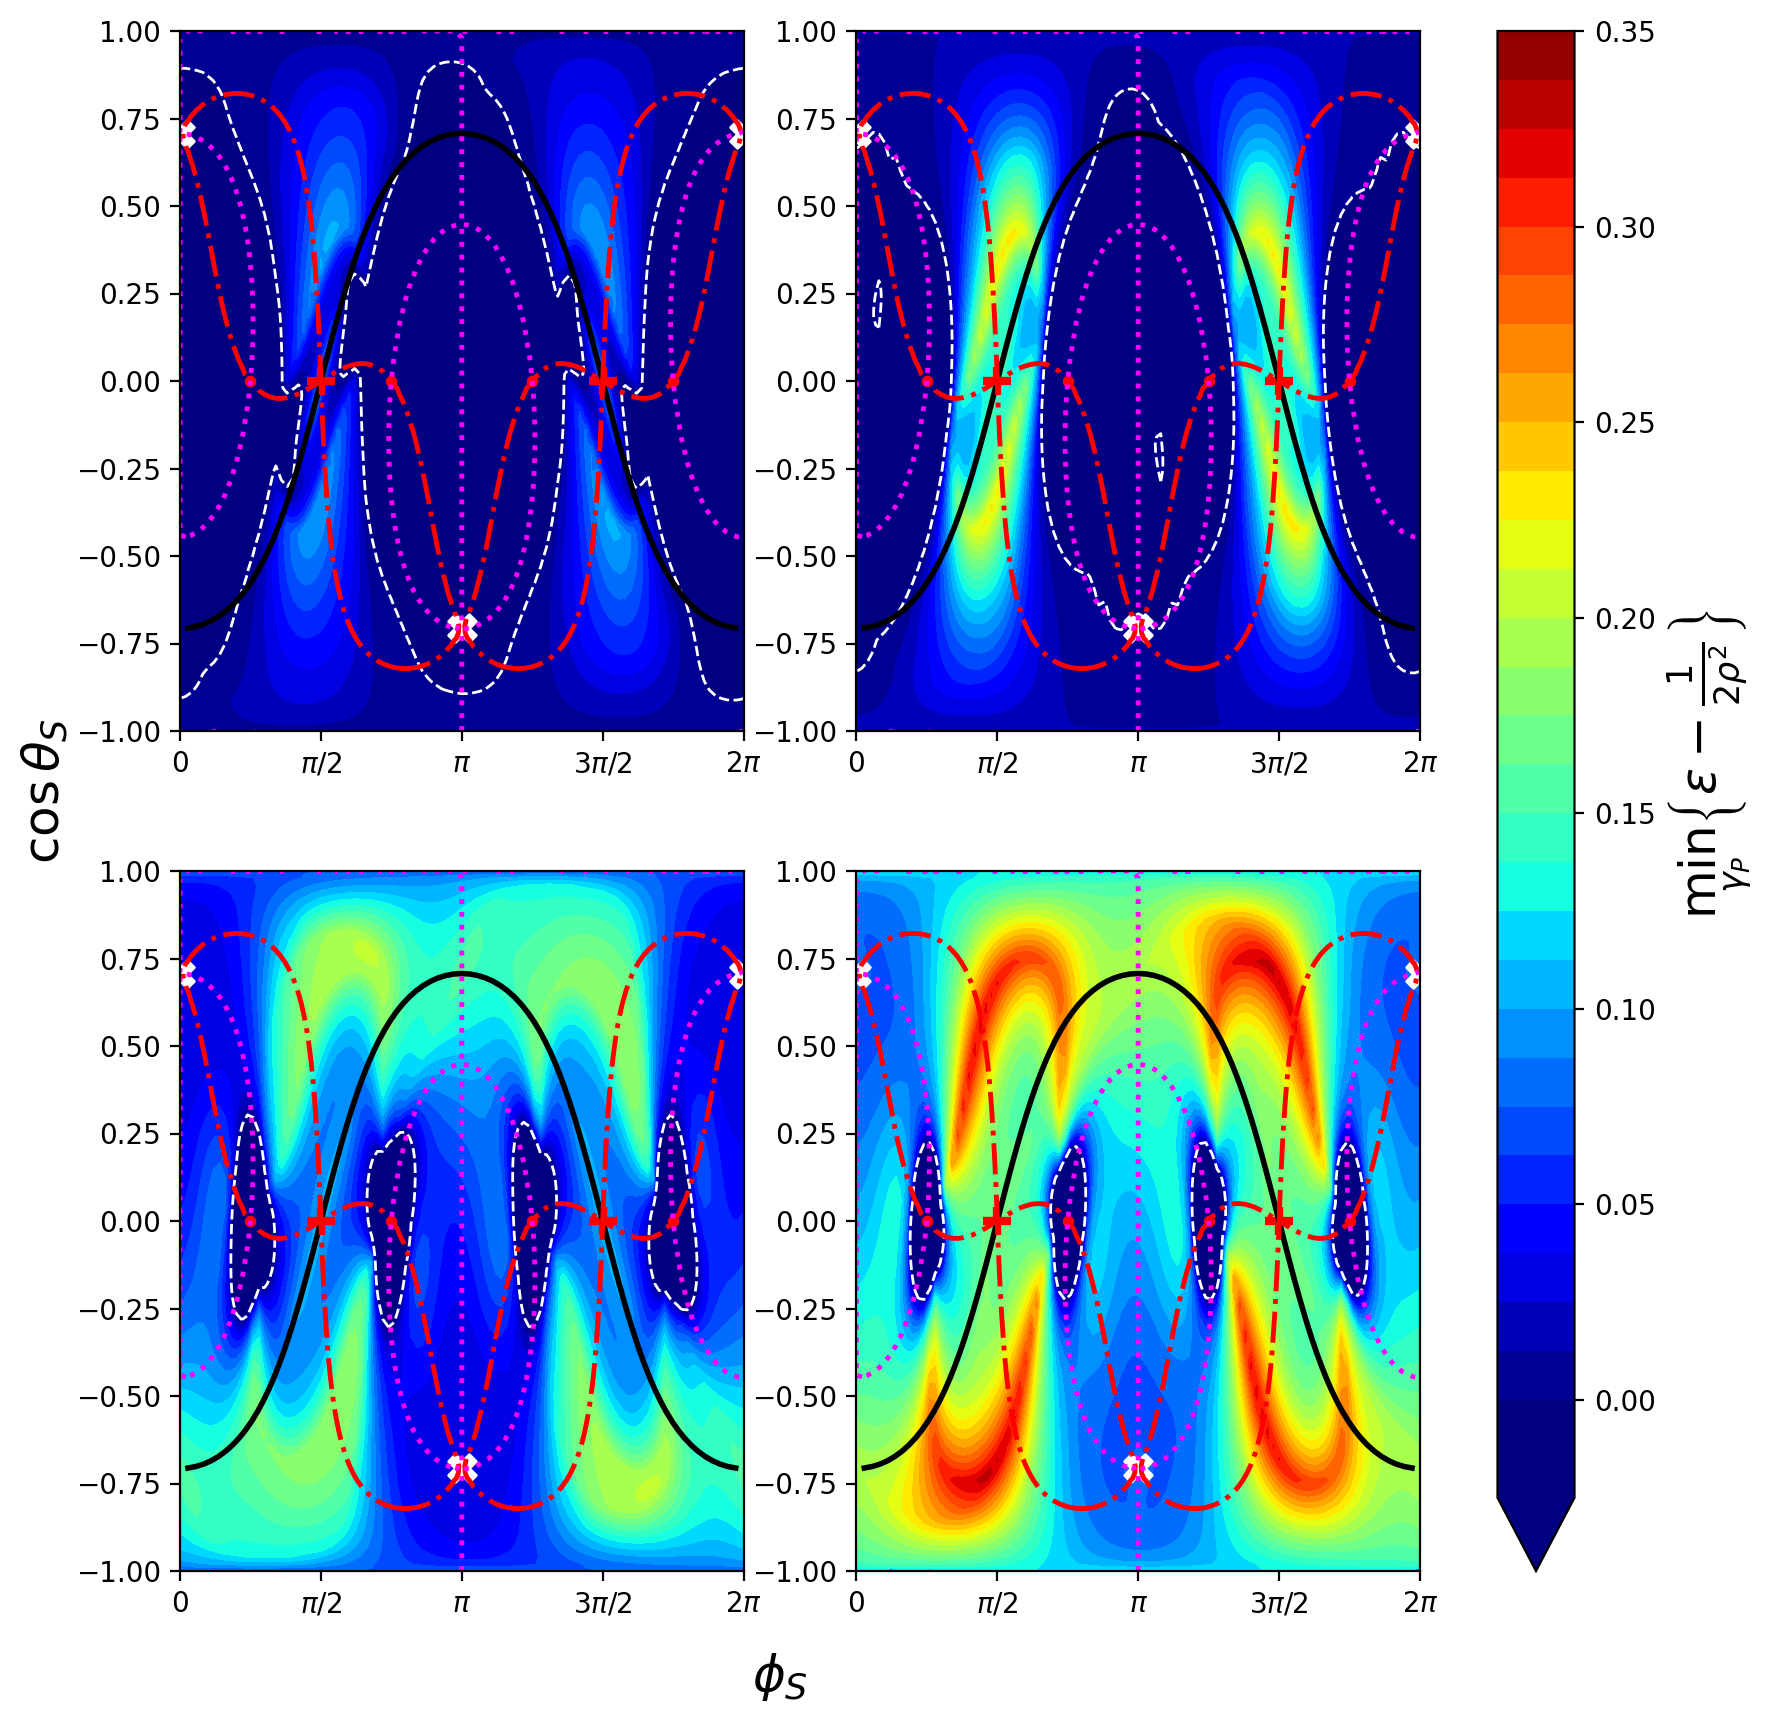

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Create a list of all z arrays
z_arrays = [min_lindblom_S_a4_f2, min_lindblom_S_a4_f3, min_lindblom_S_a8_f2, min_lindblom_S_a8_f3]

#
levels_arr = np.linspace(-0.025, 0.35, 31)

for i, ax in enumerate(axs.flat):
    contour = ax.contourf(phi_J, cos_theta_J, z_arrays[i], levels_arr, cmap='jet', vmin = 0, vmax = 0.35, extend = 'min')
    
    contourlines1 = ax.contour(phi_J, cos_theta_J, z_arrays[i], levels = [0], colors='white', linewidths=1, linestyles = '--')
    
    ax.scatter(phi_array_faceon, np.cos(theta_array_faceon), color = 'w', marker='X', s=100)
    
    ax.plot(phi_array_edgeon, np.cos(theta_array_edgeon), color = 'k', linewidth=2)

    ax.scatter(phi_array_true_null_S, np.cos(theta_array_true_null_S), color = 'r', marker='o', s=10)

    ax.scatter(phi_array_plus_null_S, np.cos(theta_array_plus_null_S), color = 'r', marker='+', s=100, linewidths=3)

    ax.contour(phi_S_arr, cos_theta_S_arr, Z_S_cos2pa, levels=[0], colors='red', linewidths=1.75, linestyles = '-.')

    ax.contour(phi_S_arr, cos_theta_S_arr, Z_S_sin2pa, levels=[0], colors='magenta', linewidths=1.75, linestyles=':')

    x_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    x_labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)

# Add a colorbar

cbar = fig.colorbar(contour, ax=axs.ravel().tolist(), boundaries = np.linspace(0, 0.35, 21), ticks = [0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35], extend = 'both')
cbar.set_label(r'$\min_{\gamma_P}\left\{\epsilon - \frac{1}{2\rho^2}\right\}$', size=18) # Increase fontsize here

fig.text(x=0.425, y=0.05, s=r'$\phi_{S}}$', ha='center', fontweight='bold', fontsize = 18) 
fig.text(x=0.045, y=0.5, s=r'$\cos{\theta_S}$', va='center', fontweight='bold', rotation='vertical', fontsize = 18)

fig.set_facecolor('none')

fig = plt.gcf()
fig.savefig('figs/mismatch_contour_thetaS_phiS_rs_z03.pdf', bbox_inches='tight', format='pdf')

In [ ]:
# Example code to run the mismatch and SNR calculations
"""
def contour_J_mismatch_SNR(args):
    # This function calculates the mismatch and SNR for a given set of parameters (theta_J, phi_J, gamma_P)
    x, y, z = args
    rp_params["theta_J"] = x
    rp_params["phi_J"] = y
    
    np_params["theta_J"] = x
    np_params["phi_J"] = y
    
    rp_params["gamma_P"] = z
    
    mismatch_rp = get_mismatch_rp(rp_params, np_params, update_tc_phic=True)
    
    snr_rp = get_SNRs(rp_params, np_params, redshift=10)
    
    return mismatch_rp, snr_rp
    
import multiprocessing as mp
pool = mp.Pool(mp.cpu_count())

rp_params["theta_tilde"] = 4.0
rp_params["omega_tilde"] = 2.0

cos_theta_J = np.linspace(-1, 1, 101)
theta_J = np.arccos(cos_theta_J)
phi_J = np.linspace(0, 2 * np.pi, 101)

gamma_P = np.linspace(0, 2* np.pi, 50)

pool = mp.Pool(mp.cpu_count())
Z_J_a4_f2 = pool.map(contour_J_mismatch_SNR, [(theta_J[i], phi_J[j], gamma_P[k]) for i in range(len(theta_J)) for j in range(len(phi_J)) for k in range(len(gamma_P))])
pool.close()

pool.join()

print("Finished calculating mismatch and SNR")

"""

# Similarly, you can implement the contour_S_mismatch_SNR function to calculate the mismatch and SNR for the S parameters.
